In [3]:
#coding=utf-8
import gdal
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree, svm, naive_bayes,neighbors
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier,  GradientBoostingClassifier
import cv2
import os

In [4]:
# prepare data
path=r"E:\project\images\researchImage\HR\originData"
img1=getBands(os.path.join(path,"000326.tif"))
img2=getBands(os.path.join(path,"040121.tif"))
data1=img1[600:1000,600:1000,:]
data2=img2[600:1000,600:1000,:]
indexName=["NDVI","NDWI","MSAVI","MTVI","VARI"]
labdata1=returnLabeldata(data1)
labdata2=returnLabeldata(data2)
data1norm=maxminNorm(data1)
data2norm=maxminNorm(data2)
labdata1norm=maxminNorm(labdata1)
labdata2norm=maxminNorm(labdata2)
data1total=np.concatenate((data1norm,labdata1norm),axis=2)
data2total=np.concatenate((data2norm,labdata2norm),axis=2)

NameError: name 'getBands' is not defined

In [26]:
# prepare mask
mask=cv2.imread(r"E:\project\images\researchImage\HR\label\mask.tif",0)
unmask=cv2.imread(r"E:\project\images\researchImage\HR\label\unmask.tif",0)

In [27]:
# load label
label1=np.loadtxt(open(r"E:\project\images\researchImage\HR\label\rgb00mask.csv","r"),delimiter=',',skiprows=25,dtype=np.int)
label2=np.loadtxt(open(r"E:\project\images\researchImage\HR\label\rgb04mask.csv","r"),delimiter=',',skiprows=25,dtype=np.int)
loc1=label1[:,:2]
loc2=label2[:,:2]


In [28]:
train1=addY(loc1,data1total,[200,125,125,125,125])
train2=addY(loc2,data2total,[200,125,125,125,125])

In [190]:
x_train1 = train1[:,:-1]
y_train1 = train1[:,-1]-1
x_train2 = train2[:,:-1]
y_train2 = train2[:,-1]-1

## 构造数据池
data pool:
feat+loc+proba+label
n*(d+2+1+1)

In [191]:
datapool1=datapool(data1total)
datapool2=datapool(data2total)

In [192]:
# 构造model
model1=RandomForestClassifier(n_estimators=50)
model2=RandomForestClassifier(n_estimators=50)

In [193]:
# 候选预测数据
unlabel1can=datapool1.getdataByloc(getlocByMask(unmask,1))
unlabel2can=datapool2.getdataByloc(getlocByMask(unmask,1))

In [ ]:
def updTrainandUnlabel(unlabel1can,unlabel2can,unlabel1canProb,unlabel2canProb,unlabel1canLab,unlabel2canLab,x_train1,y_train1,x_train2,y_train2):
    

In [195]:
epoch=0
while epoch<10:
    model1.fit(x_train1,y_train1.ravel())
    model2.fit(x_train2,y_train2.ravel())
    # 候选预测数据概率和标签
    unlabel1canProb=model1.predict_proba(unlabel1can[:,:9]).max(axis=1)
    unlabel2canProb=model2.predict_proba(unlabel2can[:,:9]).max(axis=1)
    unlabel1canLab=model1.predict(unlabel1can[:,:9])
    unlabel2canLab=model2.predict(unlabel2can[:,:9])
    unlabel1can,unlabel2can,x_train1,y_train1,x_train2,y_train2=updTrainandUnlabel(unlabel1can,unlabel2can,unlabel1canProb,unlabel2canProb,unlabel1canLab,unlabel2canLab,x_train1,y_train1,x_train2,y_train2)
    datapool1.upddata(unlabel1can)
    datapool2.upddata(unlabel2can)
    epoch+=1

epoch 0
1 (array([200, 125, 125, 125, 125], dtype=int64), array([0, 1, 2, 3, 4, 5]))
2 (array([200, 125, 125, 125, 125], dtype=int64), array([0, 1, 2, 3, 4, 5]))
1: 66325
2: 66325
845
845
879
879
891
891
900
900
900
900
1: 55063
2: 55063
epoch 1
1 (array([345, 159, 137, 134, 125], dtype=int64), array([0, 1, 2, 3, 4, 5]))
2 (array([345, 159, 137, 134, 125], dtype=int64), array([0, 1, 2, 3, 4, 5]))
1: 55063
2: 55063
1046
1046
1081
1081
1092
1092
1100
1100
1100
1100
1: 54000
2: 54000
epoch 2
1 (array([491, 194, 148, 142, 125], dtype=int64), array([0, 1, 2, 3, 4, 5]))
2 (array([491, 194, 148, 142, 125], dtype=int64), array([0, 1, 2, 3, 4, 5]))
1: 54000
2: 54000
1248
1248
1283
1283
1293
1293
1300
1300
1300
1300
1: 53499
2: 53499
epoch 3
1 (array([639, 229, 158, 149, 125], dtype=int64), array([0, 1, 2, 3, 4, 5]))
2 (array([639, 229, 158, 149, 125], dtype=int64), array([0, 1, 2, 3, 4, 5]))
1: 53499
2: 53499
1448
1448
1483
1483
1493
1493
1500
1500
1500
1500
1: 53103
2: 53103
epoch 4
1 (array([

In [131]:
model1.fit(x_train1,y_train1)
model2.fit(x_train2,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

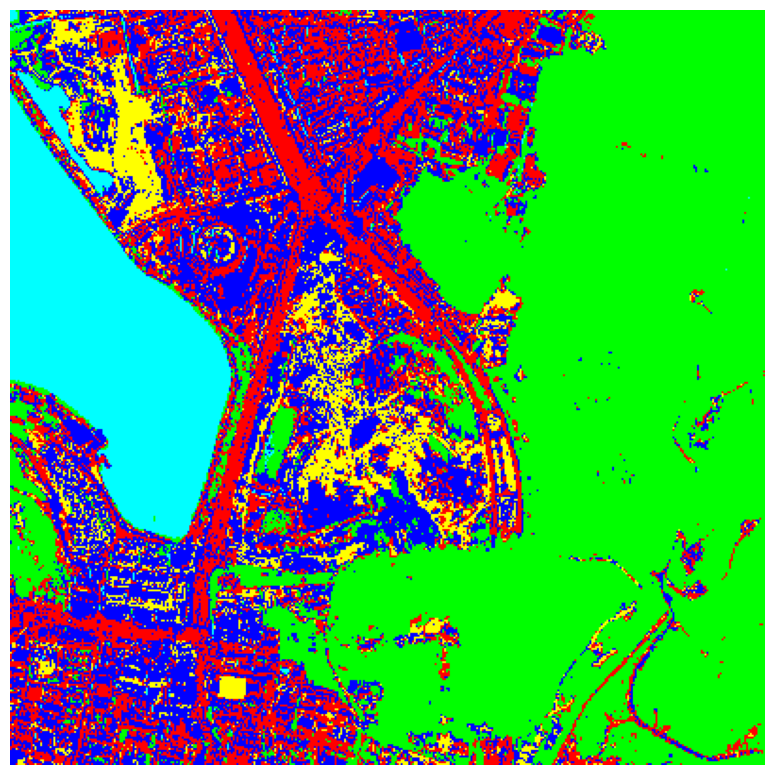

In [132]:
whole1=model1.predict(datapool1.pool[:,:9])
plt.figure(figsize=(10,10),dpi=100)
plt.imshow(color(whole1))
plt.axis("off")
plt.savefig(r"E:\project\images\researchImage\HR\output\00.jpg")

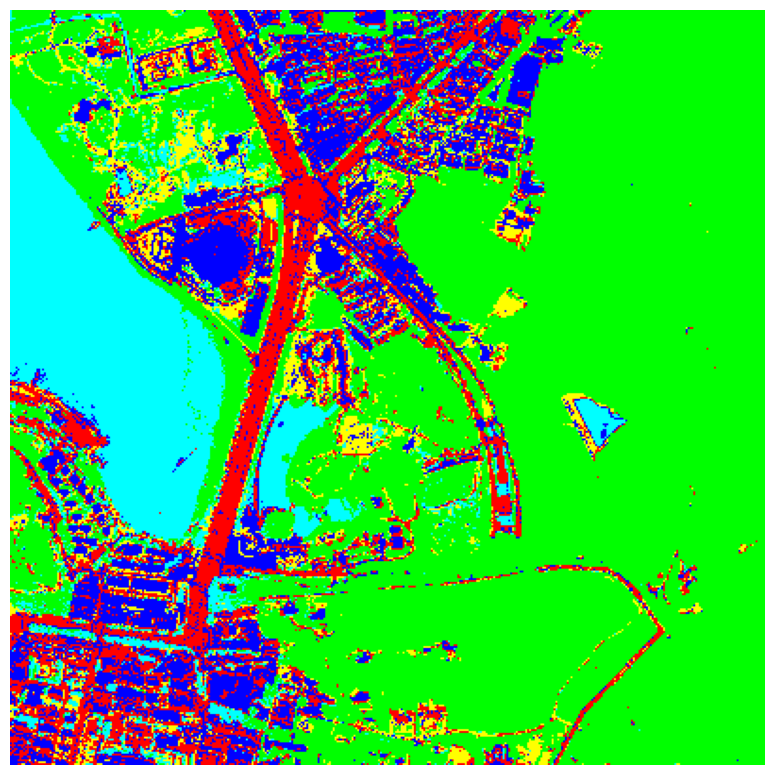

In [133]:
whole2=model2.predict(datapool2.pool[:,:9])
plt.figure(figsize=(10,10),dpi=100)
plt.imshow(color(whole2))
plt.axis("off")
plt.savefig(r"E:\project\images\researchImage\HR\output\04.jpg")

## 测试

In [6]:
# load label
lab1=np.loadtxt(open(r"E:\project\images\researchImage\HR\label\test00.csv","r"),delimiter=',',skiprows=25,dtype=np.int)
lab2=np.loadtxt(open(r"E:\project\images\researchImage\HR\label\test04.csv","r"),delimiter=',',skiprows=25,dtype=np.int)
testloc1=lab1[:,:2]
testloc2=lab2[:,:2]
test1=addY(testloc1,data1total,[1724,1344,1585,1964,1210])
test2=addY(testloc2,data2total,[2070,1024,1049,1185,127])
x_test1 = test1[:,:-1]
y_test1 = test1[:,-1]-1
x_test2 = test2[:,:-1]
y_test2 = test2[:,-1]-1

In [138]:
y_pre1 = model1.predict(x_test1)
y_pre2 = model2.predict(x_test2)

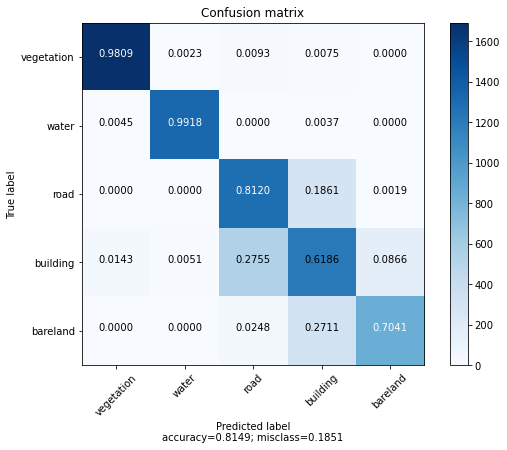

In [152]:

labels = [0, 1,2,3,4]
cm = confusion_matrix(y_test1, y_pre1, labels)
plot_confusion_matrix(cm,['vegetation','water','road','building','bareland'],r"E:\project\images\researchImage\HR\output\cm1.jpg")


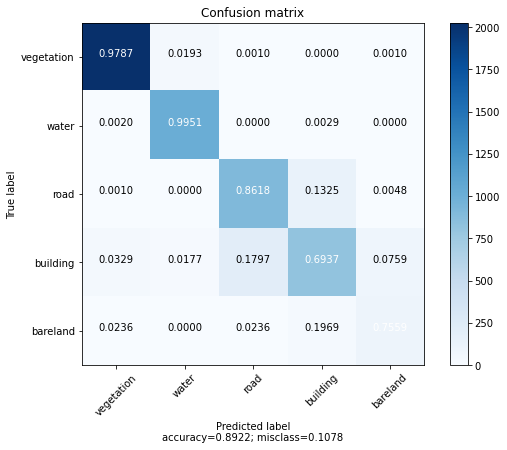

In [157]:
cm = confusion_matrix(y_test2, y_pre2, labels)
plot_confusion_matrix(cm,['vegetation','water','road','building','bareland'],r"E:\project\images\researchImage\HR\output\cm2.jpg")

In [50]:
sizes=list(range(100,500,20))
f1wgs=[]
f2wgs=[]
train1=addY(loc1,data1total,[200,125,125,125,125])[np.random.randint(700,size=200).astype(np.int),:]
train2=addY(loc2,data2total,[200,125,125,125,125])[np.random.randint(700,size=200).astype(np.int),:]
for i,size in enumerate(sizes):
    print(i)
    x_train1 = train1[:,:-1]
    y_train1 = train1[:,-1]-1
    x_train2 = train2[:,:-1]
    y_train2 = train2[:,-1]-1
    datapool1=datapool(data1total)
    datapool2=datapool(data2total)
    # 构造model
    model1=RandomForestClassifier(n_estimators=50)
    model2=RandomForestClassifier(n_estimators=50)
    # 候选预测数据
    unlabel1can=datapool1.getdataByloc(getlocByMask(unmask,1))
    unlabel2can=datapool2.getdataByloc(getlocByMask(unmask,1))
    epoch=0
    while epoch<10:
        model1.fit(x_train1,y_train1.ravel())
        model2.fit(x_train2,y_train2.ravel())
        # 候选预测数据概率和标签
        unlabel1canProb=model1.predict_proba(unlabel1can[:,:9]).max(axis=1)
        unlabel2canProb=model2.predict_proba(unlabel2can[:,:9]).max(axis=1)
        unlabel1canLab=model1.predict(unlabel1can[:,:9])
        unlabel2canLab=model2.predict(unlabel2can[:,:9])
        unlabel1can,unlabel2can,x_train1,y_train1,x_train2,y_train2=updTrainandUnlabel(size,True,unlabel1can,unlabel2can,unlabel1canProb,unlabel2canProb,unlabel1canLab,unlabel2canLab,x_train1,y_train1,x_train2,y_train2)
        datapool1.upddata(unlabel1can)
        datapool2.upddata(unlabel2can)
        epoch+=1
    model1.fit(x_train1,y_train1)
    model2.fit(x_train2,y_train2)
    y_pre1 = model1.predict(x_test1)
    y_pre2 = model2.predict(x_test2)
    f1=f1_score(y_test1, y_pre1, average='weighted')
    f1wgs.append(f1)
    f2=f1_score(y_test2, y_pre2, average='weighted')
    f2wgs.append(f2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [33]:
labelsizes=list(range(200,750,50))
f1labels=[]
f2labels=[]
for i,size in enumerate(labelsizes):
    print(i)
    train1=addY(loc1,data1total,[200,125,125,125,125])[np.random.randint(700,size=size).astype(np.int),:]
    train2=addY(loc2,data2total,[200,125,125,125,125])[np.random.randint(700,size=size).astype(np.int),:]
    x_train1 = train1[:,:-1]
    y_train1 = train1[:,-1]-1
    x_train2 = train2[:,:-1]
    y_train2 = train2[:,-1]-1
    datapool1=datapool(data1total)
    datapool2=datapool(data2total)
    # 构造model
    model1=RandomForestClassifier(n_estimators=50)
    model2=RandomForestClassifier(n_estimators=50)
    # 候选预测数据
    unlabel1can=datapool1.getdataByloc(getlocByMask(unmask,1))
    unlabel2can=datapool2.getdataByloc(getlocByMask(unmask,1))
    epoch=0
    while epoch<10:
        model1.fit(x_train1,y_train1.ravel())
        model2.fit(x_train2,y_train2.ravel())
        # 候选预测数据概率和标签
        unlabel1canProb=model1.predict_proba(unlabel1can[:,:9]).max(axis=1)
        unlabel2canProb=model2.predict_proba(unlabel2can[:,:9]).max(axis=1)
        unlabel1canLab=model1.predict(unlabel1can[:,:9])
        unlabel2canLab=model2.predict(unlabel2can[:,:9])
        unlabel1can,unlabel2can,x_train1,y_train1,x_train2,y_train2=updTrainandUnlabel(1000,True,unlabel1can,unlabel2can,unlabel1canProb,unlabel2canProb,unlabel1canLab,unlabel2canLab,x_train1,y_train1,x_train2,y_train2)
        datapool1.upddata(unlabel1can)
        datapool2.upddata(unlabel2can)
        epoch+=1
    model1.fit(x_train1,y_train1)
    model2.fit(x_train2,y_train2)
    y_pre1 = model1.predict(x_test1)
    y_pre2 = model2.predict(x_test2)
    f1=f1_score(y_test1, y_pre1, average='weighted')
    f1labels.append(f1)
    f2=f1_score(y_test2, y_pre2, average='weighted')
    f2labels.append(f2)

0
1
2
3
4
5
6
7
8
9
10


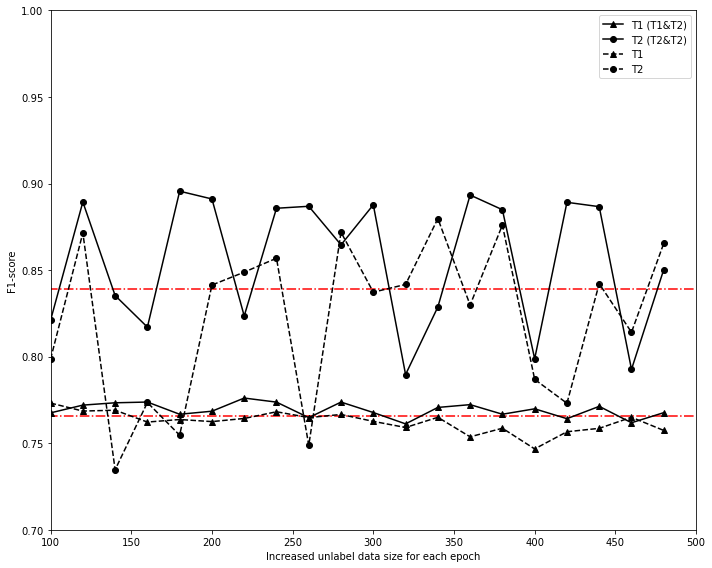

In [53]:
plt.figure(figsize=(10,8))
plt.plot(sizes,f1wgs,color='black',marker='^',linestyle='-')
plt.plot(sizes,f2wgs,color='black',marker='o',linestyle='-')
plt.plot(sizes,f1wg,color='black',marker='^',linestyle='--')
plt.plot(sizes,f2wg,color='black',marker='o',linestyle='--')
f1m=np.array(f1wg+f1wgs).mean()
f2m=np.array(f2wg+f2wgs).mean()
plt.hlines(f1m, 0, 500, colors = "red", linestyles = "-.")
plt.hlines(f2m, 0, 500, colors = "r", linestyles = "-.")
plt.ylim(0.7,1)
plt.xlim(100,500)
plt.ylabel('F1-score')
plt.xlabel("Increased unlabel data size for each epoch")
plt.legend(['T1 (T1&T2)','T2 (T2&T2)','T1','T2'])
plt.tight_layout()
plt.savefig(r"E:\project\images\researchImage\HR\output\f1score.jpg")
plt.show()

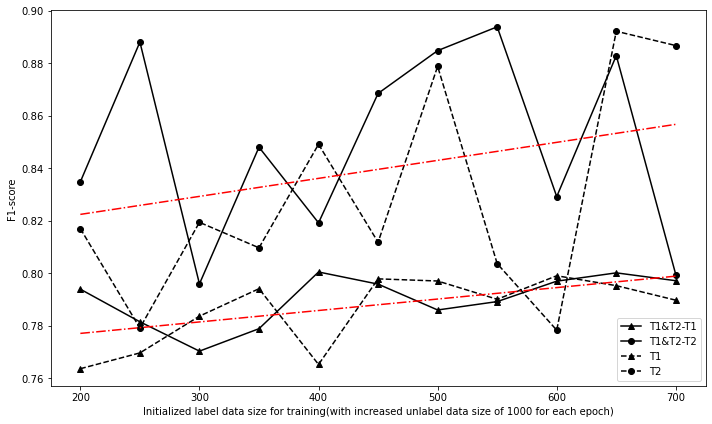

In [45]:
plt.figure(figsize=(10,6))
plt.plot(labelsizes,f1labels,color='black',marker='^',linestyle='-')
plt.plot(labelsizes,f2labels,color='black',marker='o',linestyle='-')
plt.plot(labelsizes,f1label,color='black',marker='^',linestyle='--')
plt.plot(labelsizes,f2label,color='black',marker='o',linestyle='--')
f1m=(np.array(f1label)+np.array(f1labels))/2
f2m=(np.array(f2label)+np.array(f2labels))/2
plt.plot(np.unique(labelsizes), np.poly1d(np.polyfit(labelsizes, f1m, 1))(np.unique(labelsizes)),'r-.')
plt.plot(np.unique(labelsizes), np.poly1d(np.polyfit(labelsizes, f2m, 1))(np.unique(labelsizes)),'r-.')
plt.ylabel('F1-score')
plt.xlabel("Initialized label data size for training(with increased unlabel data size of 1000 for each epoch)")
plt.legend(['T1&T2-T1','T1&T2-T2','T1','T2'])
plt.tight_layout()
plt.savefig(r"E:\project\images\researchImage\HR\output\labelf1score.jpg")
plt.show()